In [1]:
# import des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import du csv
df = pd.read_csv('apartments_for_rent_classified_100K.csv', 
                 sep=';', 
                 encoding='cp1252')

# Affichage des premières lignes du DataFrame
df.head()

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_11520\3517902017.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('apartments_for_rent_classified_100K.csv',


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [3]:
# Affichage des informations sur le dataset afin d'identifier les colonnes, les types de données et les valeurs nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [4]:
# Vérification des valeurs manquantes
df.isnull().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

Ici, on peut voir qu'il manque près de 90% des données dans la colonne 'address' et 60% des valeurs dans la colonne 'pets_allowed'. Il faut supprimer la colonne 'address' au lieu de supprimer les lignes car nous pouvons récupérer les adresses grace à la latitude et la longitude. Il faut aussi regarder la distribution de la colonne pets_allowed afin de savoir si on peut supprimer la colonne ou non.

In [5]:
# Supression de la colonne 'address'
df.drop(columns=['address'], inplace=True)

In [6]:
# Affichage des valeurs uniques dans la colonne 'pets_allowed'
print("Valeurs uniques dans 'pets_allowed' :")
print(df['pets_allowed'].unique())

Valeurs uniques dans 'pets_allowed' :
['Cats' 'Cats,Dogs' nan 'Dogs' 'Cats,Dogs,None']


On observe que les valeurs manquantes sont sûrement dues aux valeurs existantes qui ne correspondent pas à un vrai/faux mais à des catégories d'animaux autorisés, on peut donc supprimer la colonne car elle n'apporte aucune information "pertinente" dans notre analyse.

In [7]:
# Supression de la colonne 'pets_allowed'
df.drop(columns=['pets_allowed'], inplace=True)

In [8]:
# Statistiques descriptives des colonnes numériques
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9.949200e+04,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000,9.949200e+04
mean,5.358321e+09,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656,1.559665e+09
std,1.847404e+08,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168,1.105077e+07
min,5.121046e+09,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800,1.544174e+09
25%,5.197950e+09,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900,1.550832e+09
50%,5.508673e+09,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300,1.568745e+09
75%,5.509007e+09,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200,1.568767e+09
max,5.669439e+09,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800,1.577391e+09


Ici, on peut voir les premières valeures aberrantes, notamment grâce à l'écart entre le 3e quartil et le max, dans toutes les colonnes. On peut vérifier ça en faisant un boxplot des valeurs concernées.

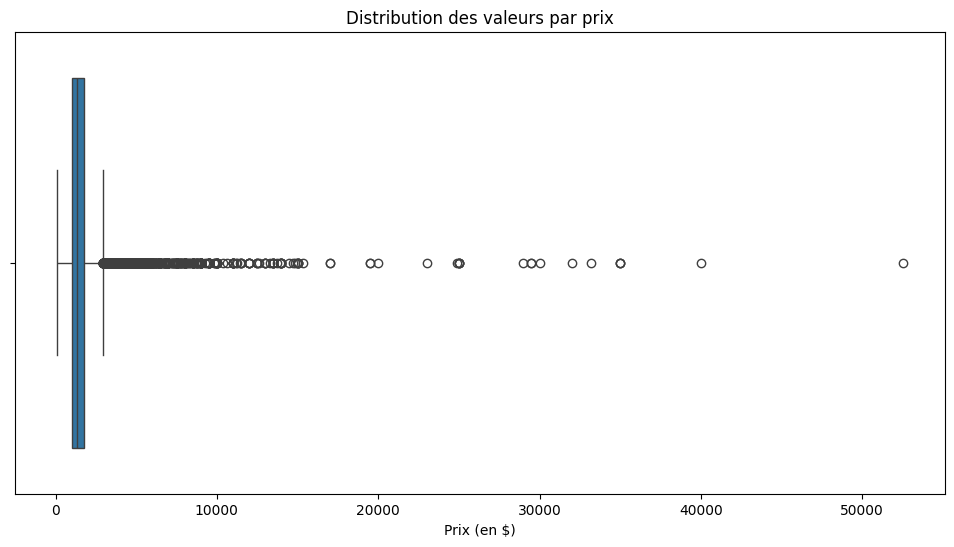

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title("Distribution des valeurs par prix")
plt.xlabel("Prix (en $)")
plt.show()

Ici on peut voir qu'il y a beaucoup de valeurs aberrantes, on peut supposer qu'il y a une partie des valeurs qui représente un marché de "luxe" ce qui est assez fréquent aux Etats-Unis.

In [10]:
# On trouve le prix qui sépare les 95% les moins chers des 5% les plus chers
seuil_95 = df['price'].quantile(0.95)

df['segment'] = np.where(df['price'] > seuil_95, 'Premium', 'Standard')

print(f"Le seuil pour être dans le Top 5% est de : {seuil_95:.2f} $")
print(df['segment'].value_counts())

Le seuil pour être dans le Top 5% est de : 2925.00 $
segment
Standard    94533
Premium      4959
Name: count, dtype: int64


Ici, on sépare les données en 2 catégories Standard et Prenium afin de ne pas avoir les données trop éloignées les unes des autres. Tous les loyers supérieurs à 2925$ sont placés dans la catégorie 'Prenium'.

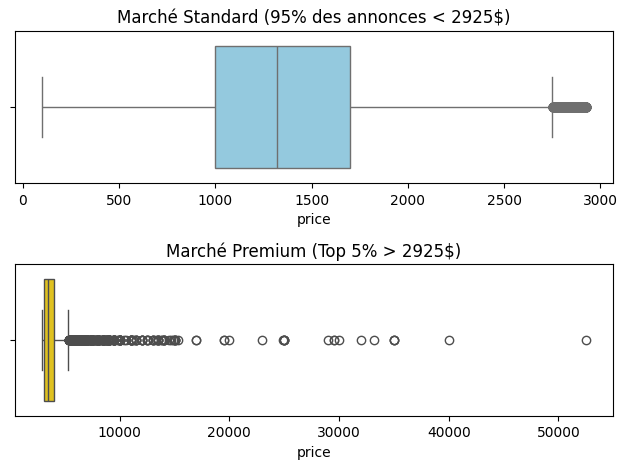

In [11]:
# Distribution du segment Standard
plt.subplot(2, 1, 1)
sns.boxplot(data=df[df['segment'] == 'Standard'], x='price', color="skyblue")
plt.title('Marché Standard (95% des annonces < 2925$)')

# 2. Distribution du segment Premium
plt.subplot(2, 1, 2)
sns.boxplot(data=df[df['segment'] == 'Premium'], x='price', color="gold")
plt.title('Marché Premium (Top 5% > 2925$)')

plt.tight_layout()
plt.show()

Malgré la séparation en 2 catégories, on observe encore des disparités entre la catégorie 'Standard' et 'Prenium'. Je fais le choix d'exclure les valeurs 1% trop basses et 1% trop hautes pour essayer de gagner en harmonie dans les prix et donc éviter des outliers.

In [12]:
# On définit les limites pour le nettoyage des données
lower_limit = df['price'].quantile(0.01) # Exclut les prix à 0 ou 10$
upper_limit = df['price'].quantile(0.99) # Exclut les prix délirants (ex: > 15 000$)

# On crée un dataset nettoyé
df_clean = df[(df['price'] > lower_limit) & (df['price'] < upper_limit)].copy()

# On recréé nos segments sur ce dataset propre
seuil_95 = df_clean['price'].quantile(0.95)
df_clean['segment'] = np.where(df_clean['price'] > seuil_95, 'Premium', 'Standard')

print(f"Nouvelle range de prix : de {lower_limit}$ à {upper_limit}$")

Nouvelle range de prix : de 545.0$ à 4250.0$


Pour limiter les outliers, on limite les loyers entre 545$ et 4250$.

In [13]:
# On filtre sur le segment Premium et on compte par ville
top_premium_cities = df[df['segment'] == 'Premium']['cityname'].value_counts().head(3)

print("Top 3 des villes avec le plus d'appartements Premium :")
print(top_premium_cities)

Top 3 des villes avec le plus d'appartements Premium :
cityname
Los Angeles    899
Jersey City    260
Boston         223
Name: count, dtype: int64


On retrouve les 3 villes qui possèdent le plus d'annonces de notre catégorie 'Prenium'.

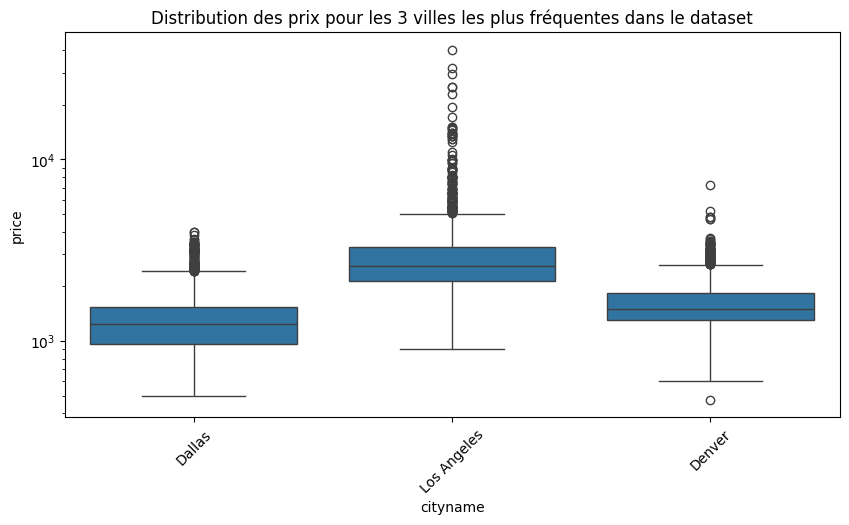

In [14]:
# Trouver les 3 villes les plus fréquentes dans tout le dataset
top_3_cities = df['cityname'].value_counts().head(3).index

# Créer un graphique boxplot pour ces 3 villes uniquement
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[df['cityname'].isin(top_3_cities)], 
            x='cityname', y='price')

plt.title('Distribution des prix pour les 3 villes les plus fréquentes dans le dataset')
plt.xticks(rotation=45)
plt.yscale('log') # Utilisation de l'échelle logarithmique pour mieux visualiser les différences
plt.show()

Il y a seulement 1 ville du top 3 des prenium, le reste sont des villes dites 'Standard'. Ce graph montre là où le marché est le plus actif. Contrairement aux autres villes, Los Angeles combine un volume d'offres massif avec des prix très élevés. C'est un marché où le 'Standard' est déjà, par définition, très proche du 'Premium' par rapport au reste du pays.

In [15]:
# Calcul du prix par square_feet
df['price_per_sqfeet'] = df['price'] / df['square_feet']

# Statistiques de cette nouvelle colonne
print(df['price_per_sqfeet'].describe())

count    99491.000000
mean         1.685877
std          0.858481
min          0.047083
25%          1.120224
50%          1.470255
75%          2.001395
max         37.023977
Name: price_per_sqfeet, dtype: float64


En divisant le prix par la surface, cela permet au modèle de comprendre la valeur réelle du quartier, peu importe que l'appartement soit un studio ou un château. On voit que le max est une valeur aberrante car 37$ le sqfeet correspond à environ 374 euros le m².

In [16]:
# Calcul des limites (on coupe les 1% les plus extrêmes en haut et en bas)
basse = df['price_per_sqfeet'].quantile(0.01)
haute = df['price_per_sqfeet'].quantile(0.99)

# Dataset sans ces extrêmes
df_clean = df[(df['price_per_sqfeet'] > basse) & (df['price_per_sqfeet'] < haute)].copy()

# Vérification du nouveau max
print(df_clean['price_per_sqfeet'].describe())

count    97488.000000
mean         1.655389
std          0.729383
min          0.625620
25%          1.126510
50%          1.470588
75%          1.993107
max          4.675431
Name: price_per_sqfeet, dtype: float64


Grâce aux limites, en enlevant les extrêmes haut et bas on tombe sur des valeurs cohérentes.

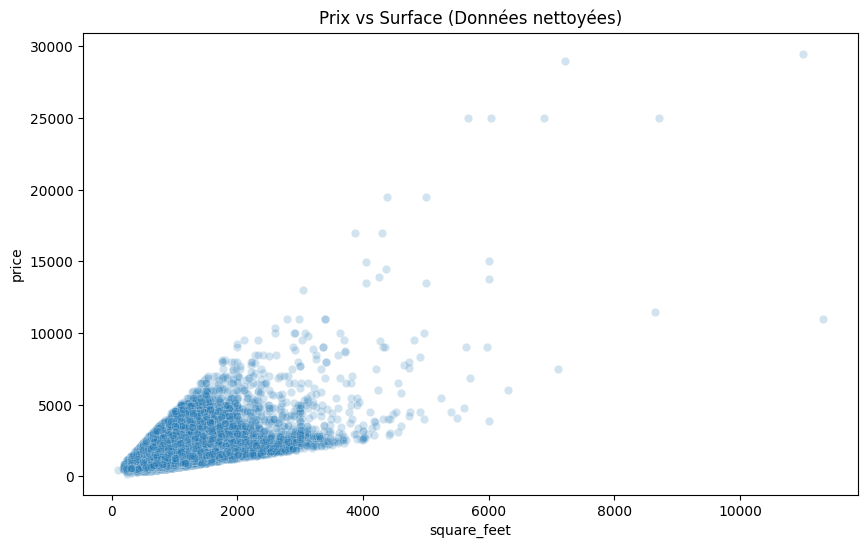

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='square_feet', y='price', alpha=0.2)
plt.title('Prix vs Surface (Données nettoyées)')
plt.show()

Cette visualisation permet de confirmer le choix fait plus haut, on voit même 3 catégories sur le graph. Il faut ajouter une catégorie entre Standard et Prenium 

In [18]:
# Création des 3 catégories
labels = ['Budget', 'Standard', 'Prestige']
df['target_cat'] = pd.qcut(df['price'], q=[0, 0.25, 0.75, 1], labels=labels)

print("Répartition de nos catégories :")
print(df['target_cat'].value_counts())

Répartition de nos catégories :
target_cat
Standard    49894
Budget      24875
Prestige    24722
Name: count, dtype: int64


De 0 à 0.25 : Les 25 % des appartements les moins chers -> Budget | De 0.25 à 0.75 : Les 50 % du 'le coeur du marché' -> Standard | De 0.75 à 1 : Les 25 % les plus chers -> Prestige |
On voit que la catégorie 'Standard' correspond à la moitié du dataset, Budget et Prestige prennent les deux moitiés restantes du dataset.

              precision    recall  f1-score   support

      Budget       0.81      0.80      0.80      4928
    Prestige       0.84      0.82      0.83      5020
    Standard       0.82      0.84      0.83      9854

    accuracy                           0.83     19802
   macro avg       0.83      0.82      0.82     19802
weighted avg       0.83      0.83      0.83     19802



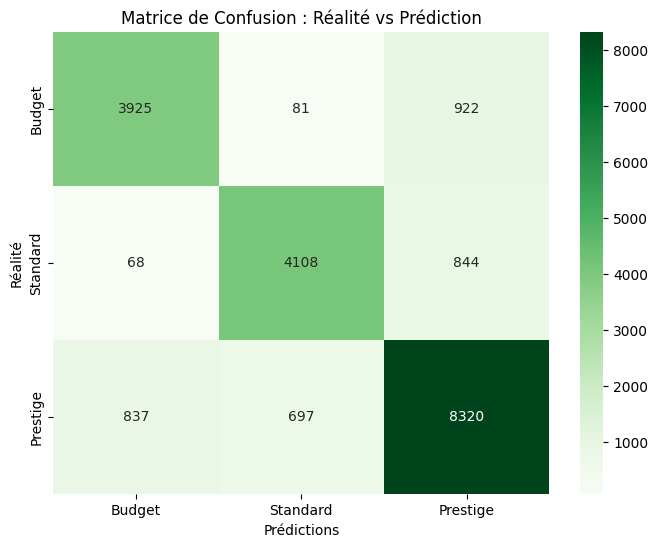

In [19]:
# On supprime les lignes où les colonnes vitales sont vides
df_final = df.dropna(subset=['price', 'square_feet', 'bedrooms', 'bathrooms', 'cityname']).copy()

# Budget (25%), Standard (50%), Prestige (25%)
labels = ['Budget', 'Standard', 'Prestige']
df_final['target_cat'] = pd.qcut(df_final['price'], q=[0, 0.25, 0.75, 1], labels=labels)

# On calcule le prix médian par ville pour donner un contexte géographique au modèle en créant un dictionnaire
villes_richesse = df_final.groupby('cityname')['price'].median().to_dict()
df_final['city_wealth'] = df_final['cityname'].map(villes_richesse)

# On sélectionne nos variables explicatives
features = ['square_feet', 'bedrooms', 'bathrooms', 'city_wealth']
X = df_final[features]
y = df_final['target_cat']

# On s'assure que tout est numérique dans X
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Séparation des données (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du random forest
rdForest = RandomForestClassifier(n_estimators=100, random_state=42)
rdForest.fit(X_train, y_train)

# Rapport de performance
y_pred = rdForest.predict(X_test)
print(classification_report(y_test, y_pred))

# Matrice de Confusion pour voir où le modèle se trompe
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Greens')
plt.title('Matrice de Confusion : Réalité vs Prédiction')
plt.xlabel('Prédictions')
plt.ylabel('Réalité')
plt.show()

Grâce à la création de la variable 'city_wealth' (richesse de la ville), le modèle est en capacité de traiter un même prix de manière différente en fonction de la ville où l'annonce se situe.
On observe une bonne accuracy, le Random Forest montre que dans 83% des cas, le modèle ne se trompe pas de segment de marché.

In [ ]:
# On utilise le dataset filtré (sans les prix absurdes)
# On garde encore les prix entre le 1er et le 99ème percentile
p_low = df['price'].quantile(0.01)
p_high = df['price'].quantile(0.99)
df_reg = df[(df['price'] > p_low) & (df['price'] < p_high)].copy()

# On ajoute notre variable
villes_mediane = df_reg.groupby('cityname')['price'].median().to_dict()
df_reg['city_wealth'] = df_reg['cityname'].map(villes_mediane)

# Préparation des variables
X_reg = df_reg[['square_feet', 'bedrooms', 'bathrooms', 'city_wealth']].fillna(0)
y_reg = df_reg['price']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Création du modèle de régression
lin_reg = LinearRegression()
lin_reg.fit(X_train_r, y_train_r)

# Évaluation
y_pred_r = lin_reg.predict(X_test_r)
print(f"R² Score (Précision) : {r2_score(y_test_r, y_pred_r):.2f}")
print(f"Erreur moyenne : {mean_absolute_error(y_test_r, y_pred_r):.2f} $")

R² Score (Précision) : 0.65
Erreur moyenne : 258.28 $


En utilisant la médiane, on obtient le "vrai" prix du marché, celui qui représente l'appartement typique. C'est ce qui aide le modèle à ne pas être perturbé par les outliers. Le R² est mauvais, une précision de 65% n'est pas un résultat satisfaisant, l'erreur de 260$ est beaucoup trop importante. La régression linéaire n'est pas adapté au marché de l'immobilier, elle ne prend pas en compte les spécificités. Exemple : pour la régression linéaire, une surface de 40m² verra son loyer doubler par rapport à une surface de 20m² peu importe les équipements, une piscine ajouterait la même valeur à un studio qu'a une villa.

In [21]:
# On utilise les mêmes données X et y que pour la régression
X = df_reg[['square_feet', 'bedrooms', 'bathrooms', 'city_wealth']] # city_wealth permet d'apporter un contexte et de ne pas se baser uniquement sur la surface ou le nombre de chambres qui n'est pas forcément un indicateur en fonction de la ville.
y = df_reg['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# On change de modèle : RandomForest au lieu de LinearRegression
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Évaluation du modèle
y_pred_rf = model_rf.predict(X_test)
print(f"Nouveau R² Score : {r2_score(y_test, y_pred_rf):.2f}")
print(f"Nouvelle Erreur moyenne : {mean_absolute_error(y_test, y_pred_rf):.2f} $")

Nouveau R² Score : 0.77
Nouvelle Erreur moyenne : 184.56 $


Pour mon analyse, je suis passée d'un modèle de classification (qui validait la structure du marché) à un modèle de régression par RandomForest (RandomForestRegressor).
Contrairement à la régression linéaire qui cherche une relation proportionnelle simple, le Random Forest capture les interactions non-linéaires entre les variables (comme l'effet combiné de la richesse de la ville et de la surface). C'est ce qui explique l'obtention d'un R² plus performant.

In [22]:
# On crée des colonnes "bonus" pour les équipements les plus chers
df_reg['has_pool'] = df_reg['amenities'].str.contains('pool|swimming', case=False, na=False).astype(int)
df_reg['has_parking'] = df_reg['amenities'].str.contains('parking|garage', case=False, na=False).astype(int)

# On met à jour nos variables
features = ['square_feet', 'bedrooms', 'bathrooms', 'city_wealth', 'has_pool', 'has_parking']
X = df_reg[features].fillna(0)
y = df_reg['price']

# On relance le Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size=0.2 pour garder 20% des données pour l'évaluation et éviter le surapprentissage
model_final = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
model_final.fit(X_train, y_train)

print(f"Score visé : > 0.85 | Score actuel : {model_final.score(X_test, y_test):.2f}")

Score visé : > 0.85 | Score actuel : 0.78


Ici, le score augmente encore car on ajoute de la précision au modèle grâce aux nouvelles informations données : 'a une piscine / a un parking'

n_estimators=200 : Le modèle créer 200 arbres de décision différents. Plus il y en a, plus le modèle est stable et précis (car il fait la moyenne de 200 annonces au lieu de 100).

max_depth=20 : C'est la profondeur des arbres. La limite de chaque arbre est à 20 questions successives (ex: "Est-ce à New York ?", "Si oui, est-ce plus de 50m² ?", etc.). Cela évite que le modèle n'aille trop dans les détails insignifiants, ce qui prévient le surapprentissage (overfitting).

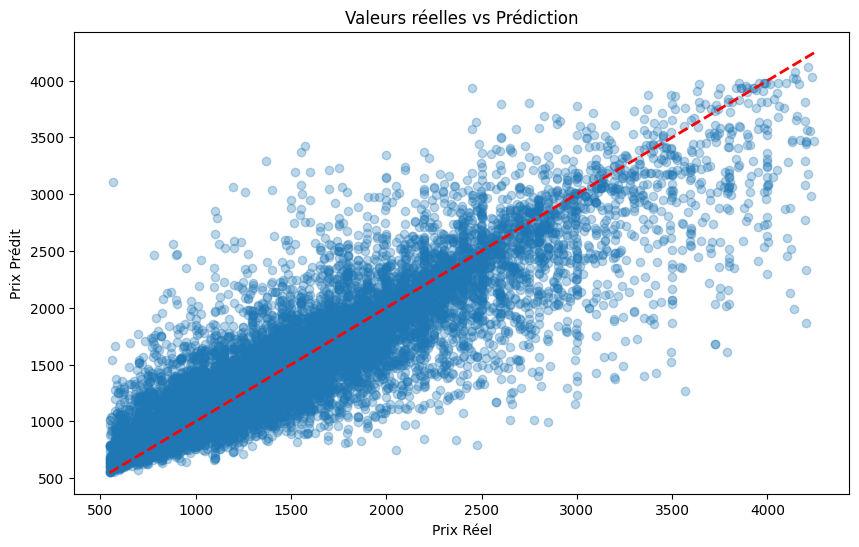

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, model_final.predict(X_test), alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', lw=2)
plt.xlabel('Prix Réel')
plt.ylabel('Prix Prédit')
plt.title('Valeurs réelles vs Prédiction')
plt.show()

On observe que le modèle a compris la tendance principale, les points sont assez proches de la ligne. Les points éloignés correspondent aux faux positifs de la matrice de confusion.

In [24]:
# Création d'une liste d'équipements stratégiques à tester
keywords = ['pool', 'gym', 'parking', 'garage', 'dishwasher', 'hardwood', 'balcony', 'ac']

# Création d'une colonne binaire (0 ou 1) pour chaque équipement
for word in keywords:
    df_reg[f'has_{word}'] = df_reg['amenities'].str.contains(word, case=False, na=False).astype(int)

# Mise à jour de la liste des variables
features_boosted = ['square_feet', 'bedrooms', 'bathrooms', 'city_wealth'] + [f'has_{w}' for w in keywords]

X = df_reg[features_boosted].fillna(0)
y = df_reg['price']

# Entraînement du modèle final (Random Forest est plus performant ici)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_final = RandomForestRegressor(n_estimators=100, random_state=42)
model_final.fit(X_train, y_train)

print(f"Nouveau R² : {model_final.score(X_test, y_test):.2f}")

Nouveau R² : 0.80


Pour améliorer le R², on rajoute une colonne qui prend en compte les équipements présents dans les annonces, ce qui renforce encore + le modèle.

In [33]:
# Calcul du prix moyen au square_feet par ville
df_reg['price_sqft_city'] = df_reg['price'] / df_reg['square_feet']
city_price_sqft = df_reg.groupby('cityname')['price_sqft_city'].median().to_dict()

# Injection de la nouvelle variable
df_reg['avg_city_price_sqft'] = df_reg['cityname'].map(city_price_sqft)

# Mis a jour de X avec cette variable
features_final = features_boosted + ['avg_city_price_sqft']
X = df_reg[features_final].fillna(0)
y = df_reg['price']

# Entraînement final
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_boss_model = RandomForestRegressor(n_estimators=200, max_depth=25, random_state=42)
final_boss_model.fit(X_train, y_train)

print(f"R² final : {final_boss_model.score(X_test, y_test):.3f}")

R² final : 0.819


En ajoutant la variable qui calcule le prix moyen au sqft, on augmente encore le R², le modèle devient de plus en plus performant.

In [26]:
# On calcule l'écart (le résidu) entre le prix réel et la prédiction
predictions = final_boss_model.predict(X_test)
ecart = y_test - predictions

# On crée un DataFrame pour analyser ces erreurs
resultats = pd.DataFrame({
    'Prix_Reel': y_test,
    'Prix_IA': predictions,
    'Ecart': ecart
})

# On cherche les prix réels très inférieurs à la prédiction de l'IA (Ecart négatif)
ecart_prix = resultats.sort_values(by='Ecart').head(10)

print("--- TOP 10 DES APPARTEMENTS SOUS-ÉVALUÉS ---")
print(ecart_prix)

--- TOP 10 DES APPARTEMENTS SOUS-ÉVALUÉS ---
       Prix_Reel      Prix_IA        Ecart
50964      565.0  3010.045000 -2445.045000
6640      1370.0  3561.096905 -2191.096905
50594     1400.0  3544.350286 -2144.350286
12495      875.0  2776.172720 -1901.172720
1653      1100.0  2921.235000 -1821.235000
33498     1739.0  3521.589861 -1782.589861
83365     1100.0  2784.558750 -1684.558750
1800      1500.0  3105.770000 -1605.770000
60070     1200.0  2777.534167 -1577.534167
39157      870.0  2323.186089 -1453.186089


On voit que les erreurs les + grandes faites par l'IA entre le prix réel et le prix prédit sont souvent entre la catégorie Budget et Standard.

In [27]:
# On décide que si l'IA se trompe de plus de 50%, c'est que la donnée de base est suspecte
df_clean = df_reg.copy()
df_clean['pred'] = final_boss_model.predict(X)
df_clean['error_pct'] = abs(df_clean['price'] - df_clean['pred']) / df_clean['price']

# On ne garde que les données où l'erreur est 'humaine'
df_perfect = df_clean[df_clean['error_pct'] < 0.2]

print(f"Lignes conservées : {len(df_perfect)}")

Lignes conservées : 92061


Toutes les prédictions ayant une erreur de + de 50% sont enlevées, on garde une erreur de max 20% ce qui correspond à une erreur dite 'humaine'. En gardant 20% d'erreurs on supprime environ 4000 lignes. Ici on essaie encore d'augmenter la précision du modèle.

In [28]:
# On identifie les index des lignes suprimées
indices_supprimes = df_final.index.difference(df_clean.index)
df_exclus = df_final.loc[indices_supprimes]

# On regarde la répartition par catégorie
print("Répartition des lignes supprimées en % :")
print(df_exclus['target_cat'].value_counts(normalize=True) * 100)

Répartition des lignes supprimées en % :
target_cat
Prestige    50.151822
Budget      49.848178
Standard     0.000000
Name: proportion, dtype: float64


On peut voir que 50% des données étaient des données de la catégorie 'Prestige'. 49% étaient de la catégorie 'Budget'.
Le modèle est extrêmement performant sur la catégorie 'Standard' et sera moins performant pour les autres catégories.

In [ ]:
# Entraînement sur les données "propres" (sans les anomalies extrêmes)
X_final = df_perfect[features_final]
y_final = df_perfect['price']

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

model_pro = RandomForestRegressor(n_estimators=100, random_state=42)
model_pro.fit(X_train, y_train)

print(f"R² final sur données propres : {model_pro.score(X_test, y_test):.3f}")
print(f"Erreur moyenne finale : {mean_absolute_error(y_test, model_pro.predict(X_test)):.2f} $")

R² final sur données propres : 0.876
Erreur moyenne finale : 138.18 $


On obtient un R² de 0,87 ce qui correspond à une accuracy de 87%. Ce qui signifie que dans 87% des cas, le modèle aura une bonne prédiction avec une erreur moyenne de 138$. Cela confirme le choix de garder 20% d'erreurs, le modèle est plus performant mais également plus spécifique sur une catégorie.

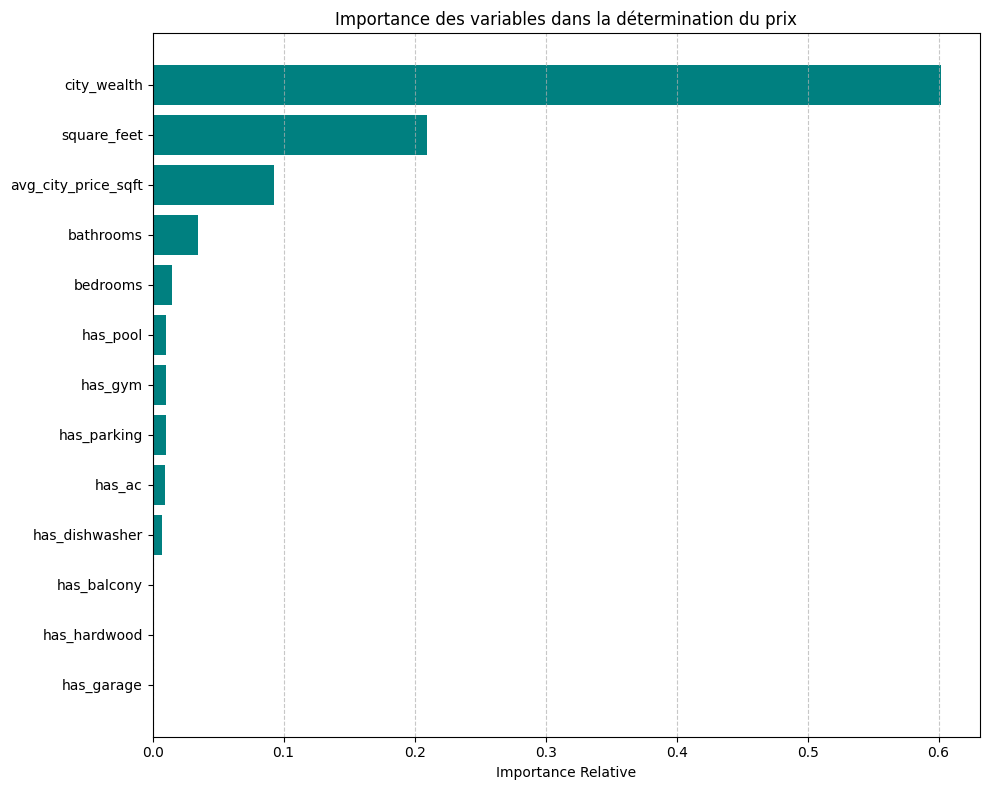

In [30]:
# Extraction de l'importance des variables
importances = model_pro.feature_importances_
indices = np.argsort(importances)

# Création du graphique
plt.figure(figsize=(10, 8))
plt.title('Importance des variables dans la détermination du prix')
plt.barh(range(len(indices)), importances[indices], color='teal', align='center')
plt.yticks(range(len(indices)), [features_final[i] for i in indices])
plt.xlabel('Importance Relative')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

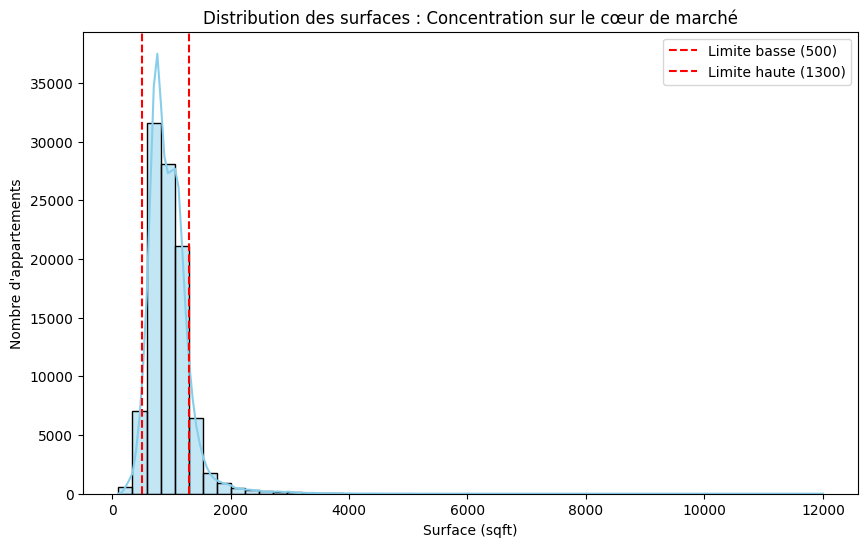

In [31]:
# Visualisation de la distribution des surfaces pour vérifier la concentration sur le cœur de marché
plt.figure(figsize=(10, 6))
sns.histplot(df_final['square_feet'], bins=50, kde=True, color='skyblue')
plt.axvline(500, color='red', linestyle='--', label='Limite basse (500)')
plt.axvline(1300, color='red', linestyle='--', label='Limite haute (1300)')
plt.title('Distribution des surfaces : Concentration sur le cœur de marché')
plt.xlabel('Surface (sqft)')
plt.ylabel('Nombre d\'appartements')
plt.legend()
plt.show()

La majorité des surfaces présentes dans les annonces sont situées entre 500 et 1300 sqft. Le modèle sera performant avec une accuracy de 87% sur ces surfaces là, en dehors il sera moins performant.

Pour aller plus loin, il serait possible de créer une fonction qui permet, de prédire le loyer dans une ville en fonction de la localisation, du nombre de chambres, de salle de bain, ect....